In [62]:
%pylab inline
from scipy.integrate import odeint  #the differential equation integrator
from mpl_toolkits.mplot3d import Axes3D  #Import 3-D plotting tool (might need later)
from matplotlib import animation    # animation package (for later)
matplotlib.rcParams['figure.figsize']= (5,5)

Populating the interactive namespace from numpy and matplotlib


# Mechanics Lab 7 – Numerical Solution to the Three-Body Problem

Today we will be looking at a problem that *cannot* be solved analytically –  the three-body problem.  We already know (or will learn soon) that two  massive objects moving within their mutually described Newtonian gravitational potential will undergo orbits shaped like conic sections – i.e. circles, ellipses, parabolas, and hyperbolas.  But what are the shapes of orbits in a three-body system?  The answer here is not straightforward and requires a computer to solve precisely, which is why a system of three bodies interacting gravitationaly is one of the classic examples of *chaos*.  


## Objectives

In this lab you will 
* create an integrator to find the motion of 2 and 3-body gravitational systems;
* test your integrator by applying it to stable situations where you can predict the orbit;
* transform the trajectories to the center-of-mass frame;
* create a movie of the motion;
* and observe chaotic 3-body trajectories.


## Preparation

#### Exercise 7.1 

First, we'll break the problem down into manageable pieces by defining a function. Each time we invoke the gravitational force law, we are going to need to find the distance between two objects.  Fix the code below to define a function that returns the distance between two objects with $x$, $y$, and $z$ coordinates $(x_{1}, y_{1}, z_{1})$ and $(x_{2}, y_{2}, z_{2})$.

In [63]:
def findDist(x1,y1,z1,x2,y2,z2):
    dist = sqrt((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)
    return dist

## A warmup:  Solving the 2-body problem numerically for a circular orbit

Let's ease our way into the more complex 3-body problem by first generating the orbital trajectory for a 2-body system undergoing a **circular** orbit.  We'll start with a large mass (say a star) with $M_{1} = 2000$ and a smaller mass (say a planet) with $M_2 = 1$. We'll work in a unit system where $G = 1.0$.  

We will confine the motion of both bodies to the x-y plane for now.  Later if we have time we will expand our solutions into 3-dimensional space.  

#### Exercise 7.2  
In the following three cells follow the prompts to fill in the appropriate initial conditions, the deriv function, and the integration call. Choose initial conditions such that the lower mass body, $M_2$, orbits in a circle 100 distance units away from the larger body, $M_1$. Integrate the trajectory from 0 to 200 with 100000 time steps.

In creating the rules for your integrator, it may help to think of the gravitational force on $M_1$ by $M_2$ as:
$$ \vec{F}_{G,1-2} = -\frac{G M_{1} M_{2} \vec{r}}{(r+\epsilon)^{3}}$$

where $\vec{r}$ is the position of $M_1$ minus the positon of $M_2$ and $\epsilon$ is a small number (0.1 is a good value) that will ensure that our masses never experience any extremely close encounters.  (However, in calculating your initial conditions, you should not include $\epsilon$.) 

*Coding style tip: rather than doing any necessary calculations to find the initial velocity of $M_2$ elsewhere (say, a piece of scratch paper), include those calculation in the cell block. This way, you'll have a record of what you did and it will be easy to reproduce the calculations for different values, for instance a larger radius circle.*

In [64]:
# Defining constants
gGrav = 1 ### FIX
epsilon = 0.1 ### FIX

# Masses
m1 = 2000 ### FIX
m2 = 1 ### FIX

#Initial Conditions

#### UNCOMMENT AND FILL IN initial conditions below
# Choose initial conditions such that the lower mass body, 
#𝑀2, orbits in a circle 100 distance units away from the larger body, 𝑀1. 
#Integrate the trajectory from 0 to 200 with 100000 time steps.

r1_0 = array([0, 0]) 
drDt1_0 = array([0, 0])

r2_0 = array([100, 0])
drDt2_0 = array([0, -sqrt(gGrav*m1/r2_0[0])])




In [65]:
def deriv_2body_2D(f,t): 
    x_1 = f[0]
    y_1 = f[1]
    
    dxDt_1 = f[2]
    dyDt_1 = f[3]
    
    x_2 = f[4]
    y_2 = f[5]
    
    dxDt_2 = f[6]
    dyDt_2 = f[7]
    
    #Derivative definitions
    
    # Students fill in below:
    dist = findDist(x_1,y_1,0,x_2,y_2,0)
    d2xDt2_1 = (gGrav*m2)/dist**3*(x_2-x_1) 
    d2yDt2_1 = (gGrav*m2)/dist**3*(y_2-y_1)
    d2xDt2_2 = (gGrav*m1)/dist**3*(x_1-x_2)
    d2yDt2_2 = (gGrav*m1)/dist**3*(y_1-y_2) 
    return array([dxDt_1, dyDt_1, d2xDt2_1, d2yDt2_1, dxDt_2, dyDt_2, d2xDt2_2, d2yDt2_2], float)

In [66]:
# Integrate your equation of motion

#### UNCOMMENT AND FILL IN code to integrate the motion from t = 0 to 
#200 with 100000 timesteps

time = linspace(0,200,100000)

# initial values
fInit = list(r1_0) + list(drDt1_0) + list(r2_0) + list(drDt2_0)
r = odeint(deriv_2body_2D, fInit, time)

fSoln = array(r)

### Plots of Trajectories

#### Exercise 7.3 
In the cell below, create plots of the trajectories (y vs. x) of both objects on the same set of axes
Also create plots of x vs. t and y vs. t for the planet (m2).  
If you were unable to obtain a circular trajectory of radius 100 for the planet (m2),
de-bug your code and try again.  If you are stuck, talk with an instructor.  




Text(0.5, 1.0, 'x and y vs t for planet2 circular motion')

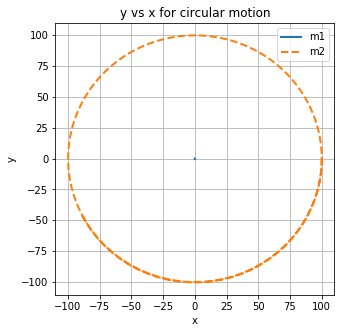

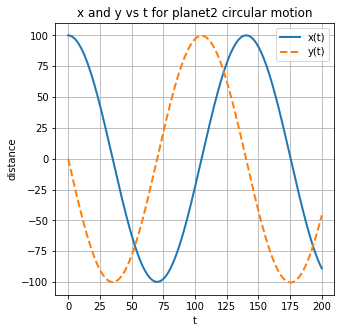

In [72]:
# y vs x
x_1 = fSoln[:,0]
y_1 = fSoln[:,1]
x_2 = fSoln[:,4]
y_2 = fSoln[:,5]
figure()
plt.grid()
plot(x_1,y_1,'-',label = 'm1', linewidth = 2)
plot(x_2,y_2,'--',label = 'm2', linewidth = 2)
legend()
plt.xlabel('x')
plt.ylabel('y')
title("y vs x for circular motion")

# x vs t
figure()
plt.grid()
plot(time,x_2,'-', label = 'x(t)', linewidth = 2)
plot(time,y_2,'--', label = 'y(t)', linewidth = 2)
legend()
plt.xlabel('t')
plt.ylabel('distance')
title("x and y vs t for planet2 circular motion")



## Numerical integration of the 3-body problem

Now let's extend our integrator to solve simultaneously for the orbits of three gravitationally interacting bodies.  

### Two planets orbiting a central star
#### Exercise 7.4 
As you build your integrator, you will want to run it on a solvable problem so you can tell whether it is working correctly. Therefore, the first case you will look at is that of two planets orbiting a central star.  The star ($M_{1} = 2000$) is initially located at the origin.  The two planets ($M_{2} = M_{3} = 1$) should be set up to undergo  circular (or approximately circular) orbits with radii of 100 and 200, respectively.  Define your initial conditions in the cell below.

In [74]:
# Defining constants
gGrav = 1 ### FIX
epsilon = 0.1 #### FIX

# Masses
m1 = 2000 #### FIX
m2 = 1 #### FIX
m3 = 1 #### FIX

# UNCOMMENT AND FILL IN initial conditions below
#Initial Conditions

r1_0 = [0,0]
drDt1_0 = [0,0]

r2_0 = [100,0]
v2_0 = sqrt(gGrav*m1/r2_0[0])
drDt2_0 = [0,v2_0]

r3_0 = [200,0]
v3_0 = sqrt(gGrav*m1/r3_0[0])
drDt3_0 = [0,v3_0]

Follow the set out steps outlined below to build your 3-body integrator. For now, we will still confine all motion to the x-y plane.  

* Paste your 2-body integration from above (`deriv_2body_2D`) into the cell below. 
* Rename it as `deriv_3body_2D`
* Update it to provide the correct position and velocity vector of a 3rd body of mass $M_{3}$, as well.   


In [78]:
# Define deriv_3body_2D below:

def deriv_3body_2D(f,t): 
    x_1 = f[0]
    y_1 = f[1]
    
    dxDt_1 = f[2]
    dyDt_1 = f[3]
    
    x_2 = f[4]
    y_2 = f[5]
    
    dxDt_2 = f[6]
    dyDt_2 = f[7]
    
    x_3 = f[8]
    y_3 = f[9]
    
    dxDt_3 = f[10]
    dyDt_3 = f[11]
    
    #Derivative definitions
    
    # Students fill in below:
    dist12 = findDist(x_1,y_1,0,x_2,y_2,0)
    dist13 = findDist(x_1,y_1,0,x_3,y_3,0)
    dist23 = findDist(x_2,y_2,0,x_3,y_3,0)
    
    d2xDt2_1 = (gGrav*m2)/dist12**3*(x_2-x_1) + (gGrav*m3)/dist13**3*(x_3-x_1)
    d2yDt2_1 = (gGrav*m2)/dist12**3*(y_2-y_1) + (gGrav*m3)/dist13**3*(y_3-y_1)
    d2xDt2_2 = (gGrav*m1)/dist12**3*(x_1-x_2) + (gGrav*m3)/dist23**3*(x_3-x_2)
    d2yDt2_2 = (gGrav*m1)/dist12**3*(y_1-y_2) + (gGrav*m3)/dist23**3*(y_3-y_2)
    d2xDt2_3 = (gGrav*m1)/dist13**3*(x_1-x_3) + (gGrav*m2)/dist23**3*(x_2-x_3)
    d2yDt2_3 = (gGrav*m1)/dist13**3*(y_1-y_3) + (gGrav*m2)/dist23**3*(y_2-y_3)
    
    return array([dxDt_1, dyDt_1, d2xDt2_1, d2yDt2_1, dxDt_2, dyDt_2, d2xDt2_2, d2yDt2_2, dxDt_3, dyDt_3, d2xDt2_3, d2yDt2_3], float)


In [83]:
# Integrate your equation of motion from t = 0 to t = 1000 with 
# 1000000 steps.
# HINT: It may take a while to integrate, 
# so try using a shorter time period (0 < t < 10) until you are 
# sure everything is working.
# BE SURE to update f_init to reflect that there are now three bodies!

time = linspace(0,1000,1000000)

# initial values
fInit3 = r1_0 + drDt1_0 + r2_0 + drDt2_0 + r3_0 + drDt3_0
r = odeint(deriv_3body_2D, fInit3, time)

fSoln = array(r)


Text(0.5, 1.0, 'x vs t for 3 body circular motion')

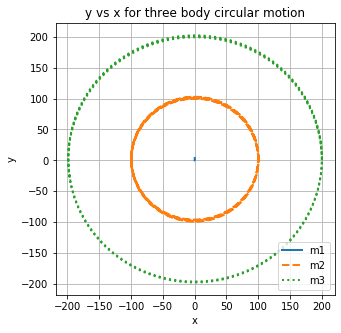

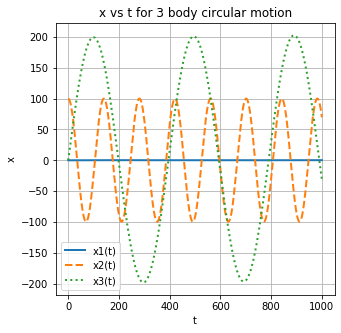

In [86]:
# Plot the trajectories (x,y) for each of the 3 masses on the 
# same set of axes
# Also create plots of x vs. t for planets M1, M2 and M3

x_1 = fSoln[:,0]
y_1 = fSoln[:,1]
x_2 = fSoln[:,4]
y_2 = fSoln[:,5]
x_3 = fSoln[:,8]
y_3 = fSoln[:,9]
figure()
plt.grid()
plot(x_1,y_1,'-',label = 'm1', linewidth = 2)
plot(x_2,y_2,'--',label = 'm2', linewidth = 2)
plot(x_3,y_3,':',label = 'm3', linewidth = 2)
legend()
plt.xlabel('x')
plt.ylabel('y')
title("y vs x for three body circular motion")

# x vs t
figure()
plt.grid()
plot(time,x_1,'-', label = 'x1(t)', linewidth = 2)
plot(time,x_2,'--', label = 'x2(t)', linewidth = 2)
plot(time,y_3,':', label = 'x3(t)', linewidth = 2)
legend()
plt.xlabel('t')
plt.ylabel('x')
title("x vs t for 3 body circular motion")

### Mystery System
#### Exercise 7.5

Let's apply our new 3-body integrator to a more physically interesting problem. Try running your integrator again with the following initial conditions:
* $M_{1} = M_{2} = 1000$
* $M_{3} = 1$
* $r_{1} = $[0.5, 0, 0]
* $v_{1} = $[0, $\sqrt{500}$, 0]
* $r_{2} = $[-0.5, 0, 0]
* $v_{2} = $[0, -$\sqrt{500}$, 0]
* $r_{3} = $[10,0,0]
* $v_{3} = $[0,$\sqrt{200}$,0]

Integrate the equations of motion for a long enough period of time to see multiple orbits of each  
object, and plot the trajectories of all three objects on the same set of axes.  

***Write a description of the physical system these initial conditions correspond to:***

In [123]:
# Defining constants
g_grav = 1 ### FIX
epsilon = 0.1 #### FIX

# Masses
m1 = 1000 #### FIX
m2 = 1000 #### FIX
m3 = 1 #### FIX



# UNCOMMENT AND FILL IN initial conditions below
#Initial Conditions

r1_0 = [.5,0,0] 
drdt1_0 = [0,sqrt(500),0]

r2_0 = [-0.5,0,0]
drdt2_0 = [0,-sqrt(500),0]

r3_0 = [10,0,0]
drdt3_0 = [0,sqrt(200),0]




In [124]:
# Integrate your equation of motion
def deriv_3body_2D2(f,t): 
    x_1 = f[0]
    y_1 = f[1]
    z_1 = f[2]
    
    dxDt_1 = f[3]
    dyDt_1 = f[4]
    dzDt_1 = f[5]
    
    x_2 = f[6]
    y_2 = f[7]
    z_2 = f[8]
    
    dxDt_2 = f[9]
    dyDt_2 = f[10]
    dzDt_2 = f[11]
    
    x_3 = f[12]
    y_3 = f[13]
    z_3 = f[14]
    
    dxDt_3 = f[15]
    dyDt_3 = f[16]
    dzDt_3 = f[17]
    
    #Derivative definitions
    
    # Students fill in below:
    dist12 = findDist(x_1,y_1,z_1,x_2,y_2,z_2)
    dist13 = findDist(x_1,y_1,z_1,x_3,y_3,z_3)
    dist23 = findDist(x_2,y_2,z_2,x_3,y_3,z_3)
    
    d2xDt2_1 = (gGrav*m2)/dist12**3*(x_2-x_1) + (gGrav*m3)/dist13**3*(x_3-x_1)
    d2yDt2_1 = (gGrav*m2)/dist12**3*(y_2-y_1) + (gGrav*m3)/dist13**3*(y_3-y_1)
    d2zDt2_1 = (gGrav*m2)/dist12**3*(z_2-z_1) + (gGrav*m3)/dist13**3*(z_3-z_1)
    
    d2xDt2_2 = (gGrav*m1)/dist12**3*(x_1-x_2) + (gGrav*m3)/dist23**3*(x_3-x_2)
    d2yDt2_2 = (gGrav*m1)/dist12**3*(y_1-y_2) + (gGrav*m3)/dist23**3*(y_3-y_2)
    d2zDt2_2 = (gGrav*m1)/dist12**3*(z_1-z_2) + (gGrav*m3)/dist23**3*(z_3-z_2)
    
    d2xDt2_3 = (gGrav*m1)/dist13**3*(x_1-x_3) + (gGrav*m2)/dist23**3*(x_2-x_3)
    d2yDt2_3 = (gGrav*m1)/dist13**3*(y_1-y_3) + (gGrav*m2)/dist23**3*(y_2-y_3)
    d2zDt2_3 = (gGrav*m1)/dist13**3*(z_1-z_3) + (gGrav*m2)/dist23**3*(z_2-z_3)
    
    return array([dxDt_1, dyDt_1,dzDt_1, d2xDt2_1, d2yDt2_1,d2zDt2_1, 
                  dxDt_2, dyDt_2,dzDt_2, d2xDt2_2, d2yDt2_2,d2zDt2_2,
                  dxDt_3, dyDt_3, dzDt_3,
                  d2xDt2_3, d2yDt2_3, d2zDt2_3], float)




In [125]:
time = linspace(0,1000,1000000)


r1_0 = [.5,0,0] 
drdt1_0 = [0,sqrt(500),0]

r2_0 = [-0.5,0,0]
drdt2_0 = [0,-sqrt(500),0]

r3_0 = [10,0,0]
drdt3_0 = [0,sqrt(200),0]

# initial values
fInit4 = r1_0 + drdt1_0 + r2_0 + drdt2_0 + r3_0 + drdt3_0
print(fInit4)
r = odeint(deriv_3body_2D2, fInit4, time)

fSoln = array(r)

[0.5, 0, 0, 0, 22.360679774997898, 0, -0.5, 0, 0, 0, -22.360679774997898, 0, 10, 0, 0, 0, 14.142135623730951, 0]


Text(0.5, 1.0, 'x vs t for 3 body circular motion')

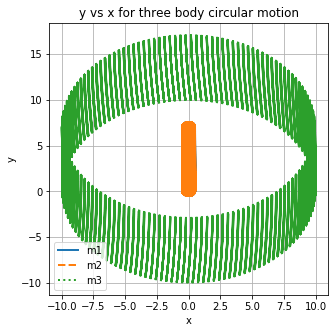

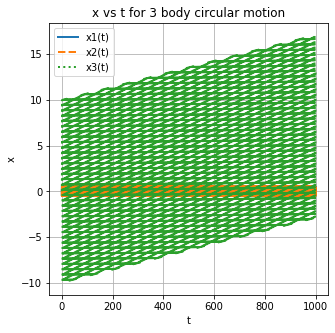

In [126]:
# Plots go here

x_1 = fSoln[:,0]
y_1 = fSoln[:,1]
x_2 = fSoln[:,6]
y_2 = fSoln[:,7]
x_3 = fSoln[:,12]
y_3 = fSoln[:,13]
figure()
plt.grid()
plot(x_1,y_1,'-',label = 'm1', linewidth = 2)
plot(x_2,y_2,'--',label = 'm2', linewidth = 2)
plot(x_3,y_3,':',label = 'm3', linewidth = 2)
legend()
plt.xlabel('x')
plt.ylabel('y')
title("y vs x for three body circular motion")

# x vs t
figure()
plt.grid()
plot(time,x_1,'-', label = 'x1(t)', linewidth = 2)
plot(time,x_2,'--', label = 'x2(t)', linewidth = 2)
plot(time,y_3,':', label = 'x3(t)', linewidth = 2)
legend()
plt.xlabel('t')
plt.ylabel('x')
title("x vs t for 3 body circular motion")

### Plotting in the center-of-mass frame of reference

You have probably noticed an interesting precession effect.  While we start the three masses in orbits that should take place (approximately) centered on the origin, their mutual gravitational interactions slowly carry them off in one direction over time -- the exact direction will depend on exactly how you chose your initial conditions. Essentially, because of the initial conditions, the system has some non-zero momentum, which causes the center of mass to move.

We can make our plots look much nicer by transforming to a coordinate system where the center of mass remains fixed at the origin.  

#### Exercise 7.6
Define two new arrays, `x_com` and `y_com` to track the location of the center of mass of the 3-body system, and then plot the trajectories of the three masses on the same set of axes.  If you have done this correctly, you should find that the precession effect has disappeared.

Text(0.5, 1.0, 'x vs t for 3 body circular motion')

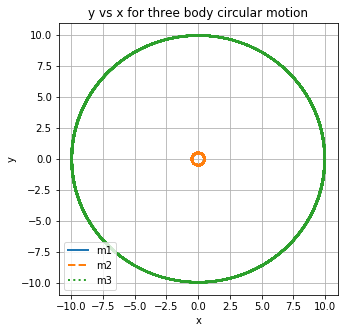

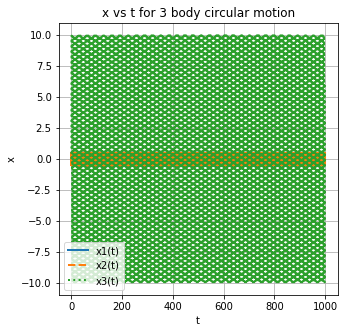

In [127]:
x_1 = array(fSoln[:,0])
y_1 = array(fSoln[:,1])
x_2 = array(fSoln[:,6])
y_2 = array(fSoln[:,7])
x_3 = array(fSoln[:,12])
y_3 = array(fSoln[:,13])

x_com = (m1*x_1 + m2*x_2 + m3*x_3)/(m1+m2+m3)
y_com = (m1*y_1 + m2*y_2 + m3*y_3)/(m1+m2+m3)

# COM Plotting
x_1 -= x_com
y_1 -= y_com
x_2 -= x_com
y_2 -= y_com
x_3 -= x_com
y_3 -= y_com

figure()
plt.grid()
plot(x_1,y_1,'-',label = 'm1', linewidth = 2)
plot(x_2,y_2,'--',label = 'm2', linewidth = 2)
plot(x_3,y_3,':',label = 'm3', linewidth = 2)
legend()
plt.xlabel('x')
plt.ylabel('y')
title("y vs x for three body circular motion")

# x vs t
figure()
plt.grid()
plot(time,x_1,'-', label = 'x1(t)', linewidth = 2)
plot(time,x_2,'--', label = 'x2(t)', linewidth = 2)
plot(time,y_3,':', label = 'x3(t)', linewidth = 2)
legend()
plt.xlabel('t')
plt.ylabel('x')
title("x vs t for 3 body circular motion")

### Making a movie!

#### Exercise 7.7
Now let's take a true look at the motion of the three masses.  Fill in the code below to create a movie of the orbital motion.

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


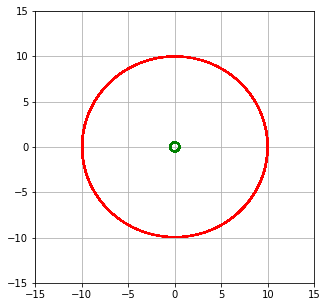

In [133]:
# Movie

%pylab
# get rid of inline plotting -- 
# movies won't work if they're run within the notebook

# create an x-y grid for plotting. 
# Choose appropriate x and y limits on your axes.
fig=figure()
plt.ion()
ax = axes(xlim=[-15,15], ylim=[-15,15])
grid()

# Fill in expressions for the coordinates of each object 
# (i.e. x1 = f_solun[:,0])

x1 = fSoln[:,0]
y1 = fSoln[:,1]

x2 = fSoln[:,6]
y2 = fSoln[:,7]

x3 = fSoln[:,12]
y3 = fSoln[:,13]


# plot orbital trajectories in the x-y plane

plt.plot(x3-x_com,y3-y_com, color='red')
plt.plot(x2-x_com,y2-y_com, color='blue')
plt.plot(x1-x_com,y1-y_com, color='green')

# initialize plotting of the positions of m1 and m2
# also plot the position of the center of mass
m3_position,= ax.plot([],[], 'ro', ms=6)
m2_position,= ax.plot([],[], 'b*', ms=10)
m1_position, = ax.plot([],[], 'g*', ms=10)


# FuncAnimation requires an initialization function.  This just
# lets FuncAnimation know that this line reference is the one to use
# The function does no plotting since set_data is empty.
def init():
    m1_position.set_data([], [])
    m2_position.set_data([], [])
    m3_position.set_data([], [])
    return m1_position, m2_position, m3_position

# function used in the FuncAnimation
def animate(i):
    # This makes the plot, by moving data into lines's set_data method
    
    j=i*10  # Animate every 10 points
    
    m3_position.set_data(x3[j]-x_com[j],y3[j]-y_com[j]) 
    m2_position.set_data(x2[j]-x_com[j],y2[j]-y_com[j])
    m1_position.set_data(x1[j]-x_com[j],y1[j]-y_com[j]) 
    
    return m1_position, m2_position, m3_position

num_frames = 200  # Animate 200 framces

# for blit True, plot only changes from previous plot to speed up plot calls
# blit must be False on osx (changing the backend will also work, but this is easier)
# use non-inline plots for animation on osx
anim= animation.FuncAnimation(fig, animate, init_func=init, frames=num_frames, blit=False)


In [115]:
# put back inline plotting
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


### Something a little different

#### Exercise 7.8
So far, you have just looked at stable configurations. These are actually rare in a 3-body system. Try changing the initial conditions until you get an unstable orbit. (Reducing the velocity of M_3 makes some fun plots.)

You are welcome to either copy and paste your code from exercise 6.5 (and possibly 6.6) below. Or you can just alter the initial conditions in exercise 6.5 and rerun your code, provided you put it back to as it was before you submit your lab. Regardless, state what masses you used and your initial conditions ***here***.

In [153]:
time = linspace(0,200,100000)


r1_0 = [.5,0,0] 
drdt1_0 = [0,sqrt(500),0]

r2_0 = [-0.5,0,0]
drdt2_0 = [-10,-sqrt(520),0]

r3_0 = [10,0,0]
drdt3_0 = [10,sqrt(120),0]

# initial values
fInit4 = r1_0 + drdt1_0 + r2_0 + drdt2_0 + r3_0 + drdt3_0
print(fInit4)
r = odeint(deriv_3body_2D2, fInit4, time)

fSoln = array(r)

[0.5, 0, 0, 0, 22.360679774997898, 0, -0.5, 0, 0, -10, -22.80350850198276, 0, 10, 0, 0, 10, 10.954451150103322, 0]


Text(0.5, 1.0, 'x vs t for 3 body circular motion')

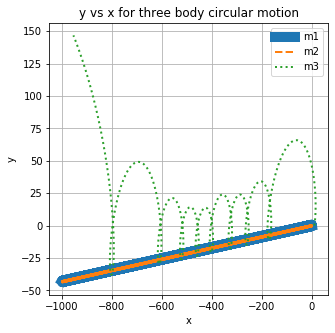

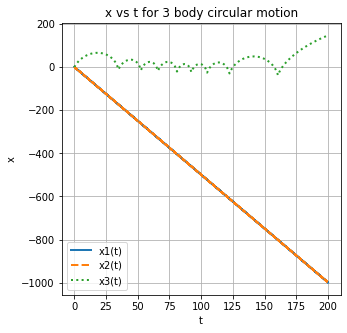

In [155]:
# Plots go here

x_1 = fSoln[:,0]
y_1 = fSoln[:,1]
x_2 = fSoln[:,6]
y_2 = fSoln[:,7]
x_3 = fSoln[:,12]
y_3 = fSoln[:,13]
figure()
plt.grid()
plot(x_1,y_1,'-',label = 'm1', linewidth = 10)
plot(x_2,y_2,'--',label = 'm2', linewidth = 2)
plot(x_3,y_3,':',label = 'm3', linewidth = 2)
legend()
plt.xlabel('x')
plt.ylabel('y')
title("y vs x for three body circular motion")

# x vs t
figure()
plt.grid()
plot(time,x_1,'-', label = 'x1(t)', linewidth = 2)
plot(time,x_2,'--', label = 'x2(t)', linewidth = 2)
plot(time,y_3,':', label = 'x3(t)', linewidth = 2)
legend()
plt.xlabel('t')
plt.ylabel('x')
title("x vs t for 3 body circular motion")

## Check-out
#### Exercise 7.9

Briefly summarize in the cell below the ideas in today's lab.

In today's lab, we learned how to solve the 2-body problem numerically for a circular orbit. By changeing the distance in to vectors, we are able to do addition and subtraction easily. We also learned 3-body motion. By skill above, we could still solve it by adding three more directions of movement of one more planet.

## Challenge Problems

If you finish early, here are some additional exercises to attempt:  
* Play around with your integrations of two planets orbiting a single star and find  
 configurations with unstable 2-planet orbits. 
* Examine conservation of energy for the 3-body systems that we modeled today
* 3-body 3-D integrator – Extend your 3-body integrator to solve the equations of motion in 3-D  
 and examine the motion along the z-axis. 
* Lagrange points are special locations where a small test mass will orbit the Sun with  
 exactly the same orbital period as the Earth.  Look up (google) the location of these  
 points, and generate a movie of the Earth/Sun system with a third low-mass object orbiting  
 at a Lagrange point.